### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
leads = pd.read_csv("Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Cleaning

In [4]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
leads.shape

(9240, 37)

In [6]:
# Dropping cloumns with Null values more than 3000
for col in leads.columns:
    if leads[col].isna().sum() > 3000:
        leads.drop(col, axis=1, inplace=True)

In [7]:
leads.shape

(9240, 31)

In [8]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
leads.drop(["City"],axis=1,inplace=True)

In [10]:
leads.drop(["Country"],axis=1,inplace=True)

In [11]:
round(leads.isna().sum()/leads.shape[0]*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [12]:
for column in leads:
    print(leads[column].astype("category").value_counts())
    print("------------------------------------------------------")

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
------------

In [13]:
leads.drop(["Lead Profile"],axis=1,inplace=True)

In [14]:
leads.drop(["How did you hear about X Education"],axis=1,inplace=True)

In [15]:
leads.drop(["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [16]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [17]:
leads.drop(["What matters most to you in choosing a course"],axis=1,inplace=True)

In [18]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
Through Recommendations                      0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [19]:
leads.shape

(9240, 15)

In [20]:
leads=leads[~pd.isnull(leads["What is your current occupation"])]

In [21]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
Through Recommendations                     0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [22]:
leads = leads[~pd.isnull(leads["TotalVisits"])]

In [23]:
leads = leads[~pd.isnull(leads["Lead Source"])]

In [24]:
leads = leads[~pd.isnull(leads["Specialization"])]

In [25]:
leads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
Through Recommendations                   0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [26]:
leads.shape

(6373, 15)

In [27]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [28]:
# Data retained percentage
leads.shape[0]/9240

0.6897186147186147

In [29]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,No,Modified


In [30]:
leads.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)

In [31]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,No,Modified


In [32]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Through Recommendations                    object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [33]:
temp = leads.loc[:,leads.dtypes=="object"]
temp

,Lead Origin,Lead Source,Do Not Email,Last Activity,Specialization,What is your current occupation,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,Page Visited on Website,Select,Unemployed,No,No,Modified
1,API,Organic Search,No,Email Opened,Select,Unemployed,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,Email Opened,Business Administration,Student,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,Unreachable,Media and Advertising,Unemployed,No,No,Modified
4,Landing Page Submission,Google,No,Converted to Lead,Select,Unemployed,No,No,Modified
...,...,...,...,...,...,...,...,...,...
9234,Landing Page Submission,Direct Traffic,No,SMS Sent,Business Administration,Unemployed,No,No,Modified
9235,Landing Page Submission,Direct Traffic,Yes,Email Marked Spam,IT Projects Management,Unemployed,No,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,SMS Sent,Media and Advertising,Unemployed,No,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,SMS Sent,Business Administration,Unemployed,No,Yes,SMS Sent


In [34]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

### Create dummies for all categorical columns

In [35]:
# Dummy encoding
dummy = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)

In [36]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [37]:
leads = pd.concat([leads, dummy], axis=1)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [38]:
leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'Through Recommendations', 'A free copy of Mastering The Interview',
       'Last Notable Activity'], axis=1, inplace=True)

In [39]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [40]:
(leads.dtypes=="object").sum()

0

### Separating the features and target variable

In [41]:
# Dropping the target column
x = leads.drop(['Converted'], axis=1)

In [42]:
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
x.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [44]:
y = leads['Converted']

### Splitting the Train & Test data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100, stratify=y)

### Scalling all continuous numerical features

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler=MinMaxScaler()

In [49]:
x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

C:\Users\cmsub\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cmsub\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [50]:
x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9192,0.163636,0.126320,0.054545,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3516,0.090909,0.046655,0.045455,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1888,0.109091,0.135123,0.109091,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
90,0.054545,0.094190,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1327,0.036364,0.031250,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## Data Modeling
### Applying Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logreg = LogisticRegression()

### Use RFE to get top 15 features

In [53]:
from sklearn.feature_selection import RFE

In [54]:
rfe = RFE(logreg, 15)

In [55]:
x_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [56]:
x_train.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9192,0.163636,0.126320,0.054545,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3516,0.090909,0.046655,0.045455,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1888,0.109091,0.135123,0.109091,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
90,0.054545,0.094190,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1327,0.036364,0.031250,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6942,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6461,0.036364,0.643046,0.036364,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
7753,0.109091,0.327905,0.027273,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8193,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5653,0.036364,0.404049,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [57]:
rfe.fit(x_train, y_train)

C:\Users\cmsub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\cmsub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\Users\cmsub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\cmsub\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=None, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [58]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 41),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 28),
 ('Lead Source_Press_Release', False, 52),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 26),
 ('Lead Source_WeLearn', False, 34),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 47),
 ('Lead Source_testone', False, 27),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 19),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link C

In [59]:
col=x_train.columns[rfe.support_]

### Create X_train with RFE selected feature

In [60]:
x_train = x_train[col]

In [61]:
import statsmodels.api as sm

### Build stats model using RFE selected top 15 features

In [62]:
x_train_sm = sm.add_constant(x_train)

In [63]:
logm2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())

In [64]:
res=logm2.fit()

In [65]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.4
Date:                Sun, 21 Mar 2021   Deviance:                       4072.9
Time:                        15:45:16   Pearson chi2:                 4.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0458      0.159     -6.595      0.000      -1.357      -0.735
TotalVisits                                              2.3132      0.655      3.534      0.000       1.030       3.596
Total Time Spent on Website                              4.2717      0.187     22.901      0.000       3.906       4.637
Lead Origin_Landing Page Submission                     -0.9801      0.137     -7.164      0.000      -1.248      -0.712
Lead Origin_Lead Add Form                                3.0699      0.239     12.844      0.000       2.601       3.538
Lead Source_Olark Chat                                   1.2830      0.147      8.747      0.000       0.996       1.570
Lead Source_Welingak Website                             3.2479      1.032      3.147      0.002       1.225       5.271
Do Not Email_Yes                                        -1.2394      0.192     -6.442      0.000      -1.616      -0.862
Last Activity_Had a Phone Conversation                   1.9501      0.912      2.139      0.032       0.163       3.737
Last Activity_SMS Sent                                   1.0618      0.085     12.486      0.000       0.895       1.228
Specialization_Select                                   -0.9812      0.134     -7.325      0.000      -1.244      -0.719
What is your current occupation_Housewife               23.2117   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
What is your current occupation_Working Professional     2.2363      0.190     11.795      0.000       1.865       2.608
Last Notable Activity_Modified                          -0.8950      0.092     -9.728      0.000      -1.075      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3317      0.460     -2.895      0.004      -2.233      -0.430
Last Notable Activity_Unreachable                        2.6890      1.089      2.469      0.014       0.554       4.824
========================================================================================================================
"""

### Check VIF

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["VIF"] = round(vif["VIF"])
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [68]:
x_train.drop("What is your current occupation_Housewife", axis=1, inplace=True)

In [69]:
x_train_sm=sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.8
Date:                Sun, 21 Mar 2021   Deviance:                       4085.6
Time:                        15:45:16   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0353      0.158     -6.540      0.000      -1.346      -0.725
TotalVisits                                              2.2630      0.654      3.458      0.001       0.980       3.546
Total Time Spent on Website                              4.2645      0.186     22.896      0.000       3.899       4.630
Lead Origin_Landing Page Submission                     -0.9737      0.137     -7.131      0.000      -1.241      -0.706
Lead Origin_Lead Add Form                                3.0680      0.239     12.848      0.000       2.600       3.536
Lead Source_Olark Chat                                   1.2766      0.147      8.713      0.000       0.989       1.564
Lead Source_Welingak Website                             3.2448      1.032      3.144      0.002       1.222       5.268
Do Not Email_Yes                                        -1.2436      0.192     -6.470      0.000      -1.620      -0.867
Last Activity_Had a Phone Conversation                   1.9416      0.911      2.131      0.033       0.155       3.728
Last Activity_SMS Sent                                   1.0540      0.085     12.410      0.000       0.888       1.220
Specialization_Select                                   -0.9845      0.134     -7.360      0.000      -1.247      -0.722
What is your current occupation_Working Professional     2.2283      0.189     11.762      0.000       1.857       2.600
Last Notable Activity_Modified                          -0.8902      0.092     -9.701      0.000      -1.070      -0.710
Last Notable Activity_Olark Chat Conversation           -1.3326      0.460     -2.898      0.004      -2.234      -0.431
Last Notable Activity_Unreachable                        2.6804      1.089      2.462      0.014       0.546       4.815
========================================================================================================================
"""

In [70]:
x_train.drop(["Last Notable Activity_Unreachable", "Last Activity_Had a Phone Conversation"], axis=1, inplace=True)

In [71]:
x_train_sm=sm.add_constant(x_train)
logm1 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.4
Date:                Sun, 21 Mar 2021   Deviance:                       4100.8
Time:                        15:45:16   Pearson chi2:                 4.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9909      0.157     -6.305      0.000      -1.299      -0.683
TotalVisits                                              2.2559      0.654      3.450      0.001       0.974       3.537
Total Time Spent on Website                              4.2537      0.186     22.906      0.000       3.890       4.618
Lead Origin_Landing Page Submission                     -0.9984      0.136     -7.347      0.000      -1.265      -0.732
Lead Origin_Lead Add Form                                3.0498      0.238     12.795      0.000       2.583       3.517
Lead Source_Olark Chat                                   1.2480      0.146      8.553      0.000       0.962       1.534
Lead Source_Welingak Website                             3.2399      1.032      3.140      0.002       1.217       5.263
Do Not Email_Yes                                        -1.2522      0.192     -6.517      0.000      -1.629      -0.876
Last Activity_SMS Sent                                   1.0371      0.085     12.238      0.000       0.871       1.203
Specialization_Select                                   -0.9957      0.133     -7.469      0.000      -1.257      -0.734
What is your current occupation_Working Professional     2.2343      0.189     11.814      0.000       1.864       2.605
Last Notable Activity_Modified                          -0.8941      0.091     -9.780      0.000      -1.073      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3477      0.460     -2.933      0.003      -2.248      -0.447
========================================================================================================================
"""

In [72]:
vif = pd.DataFrame()
vif["Features"] = x_train.columns
vif["VIF"] = [variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif["VIF"] = round(vif["VIF"])
vif = vif.sort_values(by="VIF",ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
7,Last Activity_SMS Sent,2.0
8,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
9,What is your current occupation_Working Profes...,1.0


## Predicting test data

In [73]:
x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(x_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

C:\Users\cmsub\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\cmsub\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [74]:
x_test = x_test[col]

In [75]:
x_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
1077,0.007968,0.148248,1,0,0,0,0,0,0,0,0,0,0,0,0
2079,0.015936,0.154537,1,0,0,0,0,0,0,0,0,0,0,0,0
2325,0.027888,0.020216,0,0,0,0,0,0,0,1,0,0,0,0,0
1132,0.000000,0.000000,0,0,0,0,0,0,1,1,0,0,1,0,0
7181,0.011952,0.590296,0,0,0,0,0,0,0,1,0,0,0,0,0


In [76]:
x_test_sm = sm.add_constant(x_test)

In [77]:
x_test.drop(["What is your current occupation_Housewife", "Last Notable Activity_Unreachable", "Last Activity_Had a Phone Conversation"], axis=1, inplace=True)

In [78]:
x_test_sm = sm.add_constant(x_test)

In [79]:
y_test_pred = res.predict(x_test_sm)
y_test_pred[:10]

1077    0.207390
2079    0.214839
2325    0.137319
1132    0.136617
7181    0.634428
249     0.928533
7581    0.035492
6474    0.110426
8211    0.784852
8723    0.177558
dtype: float64

In [80]:
y_test_pred = y_test_pred.values.reshape(-1)

In [81]:
y_test_pred_final = pd.DataFrame({"Converted": y_test.values, "Conversion_prob": y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_prob
0,1,0.207390
1,1,0.214839
2,0,0.137319
3,1,0.136617
4,0,0.634428


In [82]:
y_test_pred_final["predicted"] = y_test_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head()

,Converted,Conversion_prob,predicted
0,1,0.207390,0
1,1,0.214839,0
2,0,0.137319,0
3,1,0.136617,0
4,0,0.634428,1


In [83]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted)
confusion

array([[843, 149],
       [243, 677]], dtype=int64)

In [84]:
metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.predicted)

0.7949790794979079

In [85]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [86]:
# calculating sensitivity
TP/(TP+FN)

0.7358695652173913

In [87]:
# calculating specificity
TN/(TN+FP)

0.8497983870967742

In [88]:
def draw_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label="ROC curve (area=%0.2f)" % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc="lower right")
    plt.show()
    return None

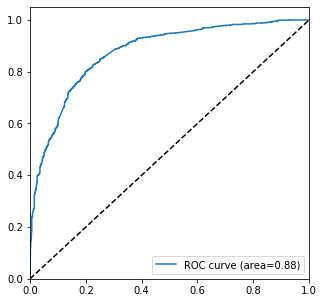

In [89]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Conversion_prob)

### Find optimal cutoff point

In [90]:
numbers = [float(x)/10 for x in range(10)]
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [91]:
for i in numbers:
    y_test_pred_final[i]=y_test_pred_final.Conversion_prob.map(lambda x: 1 if x>i else 0)

y_test_pred_final.head(10)

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.207390,0,1,1,1,0,0,0,0,0,0,0
1,1,0.214839,0,1,1,1,0,0,0,0,0,0,0
2,0,0.137319,0,1,1,0,0,0,0,0,0,0,0
3,1,0.136617,0,1,1,0,0,0,0,0,0,0,0
4,0,0.634428,1,1,1,1,1,1,1,1,0,0,0
5,1,0.928533,1,1,1,1,1,1,1,1,1,1,1
6,0,0.035492,0,1,0,0,0,0,0,0,0,0,0
7,0,0.110426,0,1,1,0,0,0,0,0,0,0,0
8,1,0.784852,1,1,1,1,1,1,1,1,1,0,0
9,0,0.177558,0,1,1,0,0,0,0,0,0,0,0


In [92]:
cutoff_df_test = pd.DataFrame(columns=["prob", "accuracy", "sensitivity", "specificity"])

In [93]:
for i in numbers:
    cm2=metrics.confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final[i])
    total=sum(sum(cm2))
    accuracy=(cm2[0,0]+cm2[1,1])/total
    specificity=cm2[0,0]/(cm2[0,0]+cm2[0,1])
    sensitivity=cm2[1,1]/(cm2[1,1]+cm2[1,0])
    cutoff_df_test.loc[i]=[i, accuracy, sensitivity, specificity]

In [94]:
cutoff_df_test

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.481172,1.000000,0.000000
0.1,0.1,0.589435,0.984783,0.222782
0.2,0.2,0.733264,0.940217,0.541331
0.3,0.3,0.779812,0.897826,0.670363
0.4,0.4,0.801255,0.800000,0.802419
0.5,0.5,0.794979,0.735870,0.849798
0.6,0.6,0.755230,0.600000,0.899194
0.7,0.7,0.738494,0.527174,0.934476
0.8,0.8,0.696130,0.396739,0.973790
0.9,0.9,0.632845,0.245652,0.991935


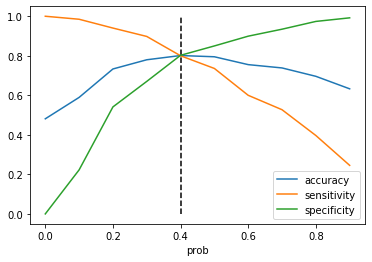

In [95]:
cutoff_df_test.plot.line(x="prob", y=["accuracy", "sensitivity", "specificity"])
plt.vlines(x=0.4, ymax=1.0, ymin=0.0, colors="black", linestyles="--")
plt.show()